# Task
Для кожної компанії розуміння своїх доходів є дуже важливим щодо
вирахування ризиків, планування майбутніх інвестицій, визначення
маркетингових бюджетів і бюджетів на інфраструктуру. Усе це має прямий
вплив на те, скільки грошей у перспективі може принести продукт, і на
вашу привабливість для інвесторів. У холдингу Genesis кожна компанія від
самого заснування розвʼязує це питання, використовуючи різні
інструменти.

На чемпіонаті ваша команда спеціалістів Data Science має виконати
прогнозування доходів від користувачів. Крім цього, ваш CEO хотів би
також побачити робастну інтероперабельну модель, яка буде готова до
використання командою продукту та маркетингу.

## About
Дані, які ви будете використовувати, взяті з реального проєкту компанії —
мобільної гри для платформ iOS і Android. У ній ви можете знайти книги у
вигляді візуальних новел. Кожна містить у собі частини, де гравець має
робити вибір, що впливає на сюжет і кінцівку.

У грі є дві валюти, що можуть бути отримані за щоденні челенджі або
придбані за реальні гроші: кристали, які використовуються для відкриття
платних виборів у сюжеті, і тікети для відкриття наступних частин книги
(перша завжди є безплатною).

Крім того, користувач може придбати підписку, яка дає нескінченну
кількість ресурсів на певний час.

Для гравців, які цим не скористалися, на різних етапах гри може
транслюватися реклама, яка допомагає їх монетизувати

## Data
target_full_ltv_day30 є головною змінною в цій задачі та являє собою
сумарні доходи з користувача на тридцятий день його життя. Саме її ви
маєте прогнозувати, і саме по ній ми будемо оцінювати точність вашої
кінцевої моделі.

Крім змінної, вказаної вище, ви також отримаєте 3 додаткових, які в сумі
дорівнюють ключовій. Тобто target_full_ltv_day30 = target_sub_ltv_day30 +
target_iap_ltv_day30 + target_ad_ltv_day30, де
- target_sub_ltv_day30 – доходи з підписок;
- target_iap_ltv_day30 – доходи з покупки кристалів і тікетів;
- target_ad_ltv_day30 – доходи з реклами.
- total_sessions_day{N} – кумулятивна кількість сесій користувача на день N;
- chapters_finished_day{N} – кількість унікальних глав книги, які було закінчено за N днів;
- chapters_opened_day{N} – кількість унікальних глав, які було почато за N днів;
- chapters_closed_day{N} – кількість унікальних глав книги, які було закрито за N днів (закриття глави не означає її закінчення);
- diamonds_received_day{N} – кількість кристалів, які користувач купив або отримав за N днів;
- diamonds_spent_day{N} – кількість кристалів, які було витрачено за N днів;
- tickets_spent_day{N} – кількість тікетів, які було витрачено за N днів;
- retained_day{N} – булева змінна, означає повернення користувача в гру на день N;
- app_sub_ltv_day{N} – кумулятивні доходи з підписок на день N;
- app_iap_ltv_day{N} – кумулятивні доходи з купівлі кристалів або тікетів на день N;
- ad_ltv_day{N} – кумулятивні доходи з реклами на день N;
- chapters_finished_session{N} – кількість унікальних глав книги, які було закінчено за N сесій;
- chapters_opened_session{N} – кількість унікальних глав, які було відкрито за N сесій;
- chapters_closed_session{N} – кількість унікальних глав, які було закрито за N сесій;
- diamonds_spent_session{N} – кількість кристалів, які було витрачено за N сесій;
- tickets_spent_session{N} – кількість тікетів, які було витрачено за N сесій;
- media_source – закодоване джерело трафіку, з якого прийшов користувач (Facebook, Google тощо);
- install_date – дата встановлення гри;
- country_code – код країни з якої прийшов користувач;
- platform – платформа на яку була встановлена гра (iOS/Android).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('TEST TASK (dataset).csv')
df

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_135,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_2,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_1,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,10,10,3,3,3,3,282,282,282,282,254,254,254,254,7,7,7,7,0,0,0,1,1,8,2,2,9,0,0,3,29,29,237,1,1,6,0.0,0.0,0.00000,4.174198,4.174198,4.174198,SOURCE_17,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,12,13,0,0,0,0,346,554,658,732,254,542,658,721,5,9,11,12,1,1,0,3,9,13,4,10,13,0,0,0,174,542,721,3,9,12,0.0,0.0,1.17629,4.899572,7.841280,9.404430,SOURCE_23,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,16,19,0,0,0,0,265,497,857,913,254,496,809,901,4,8,13,16,1,1,0,0,5,13,1,5,14,0,0,0,0,254,685,0,4,12,0.0,0.0,0.00000,4.036153,8.875894,13.928170,SOURCE_23,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,24,24,7,7,7,7,1308,1308,1308,1308,1278,1278,1278,1278,12,12,12,12,0,0,0,9,23,25,10,23,25,4,7,7,524,1249,1295,6,12,12,0.0,0.0,0.00000,7.402224,7.402224,7.402224,SOURCE_4,2021-12-30,COUNTRY_141,0.177550,0.177550,0.177550,ios,0.000000,7.402224,0.177550,7.579774


# EDA

Отже, при першому знайомстві із датасетом можемо спостерігати фічу 'install_date', хорошою практикою є розділити її на три окремі, що означатимуть рік, місяць та день відповідно. Також добавимо день тижня, в який відбулася інсталяція. При аналізі взаємозв'язків між даними оцінемо доцільність нашого рішення.

In [3]:
df['year'] = pd.to_datetime(df['install_date']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['install_date']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['install_date']).dt.strftime('%d')
df['day_of_week'] = pd.to_datetime(df['install_date']).dt.strftime('%w')
df

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30,year,month,day,day_of_week
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_135,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_2,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_1,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,10,10,3,3,3,3,282,282,282,282,254,254,254,254,7,7,7,7,0,0,0,1,1,8,2,2,9,0,0,3,29,29,237,1,1,6,0.0,0.0,0.00000,4.174198,4.174198,4.174198,SOURCE_17,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356,2021,12,30,4
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,12,13,0,0,0,0,346,554,658,732,254,542,658,721,5,9,11,12,1,1,0,3,9,13,4,10,13,0,0,0,174,542,721,3,9,12,0.0,0.0,1.17629,4.899572,7.841280,9.404430,SOURCE_23,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008,2021,12,30,4
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,16,19,0,0,0,0,265,497,857,913,254,496,809,901,4,8,13,16,1,1,0,0,5,13,1,5,14,0,0,0,0,254,685,0,4,12,0.0,0.0,0.00000,4.036153,8.875894,13.928170,SOURCE_23,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221,2021,12,30,4
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,24,24,7,7,7,7,1308,1308,1308,1308,1278,1278,1278,1278,12,12,12,12,0,0,0,9,23,25,10,23,25,4,7,7,524,1249,1295,6,12,12,0.0,0.0,0.00000,7.402224,7.402224,7.402224,SOURCE_4,2021-12-30,COUNTRY_141,0.17

Оглянемо весь перелік фіч, який нам доступний та погрупуємо ії за значенням.

In [14]:
df.columns

Index(['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3',
       'total_sessions_day7', 'chapters_finished_day0',
       'chapters_finished_day1', 'chapters_finished_day3',
       'chapters_finished_day7', 'chapters_opened_day0',
       'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1', 'chapters_closed_day3',
       'chapters_closed_day7', 'diamonds_received_day0',
       'diamonds_received_day1', 'diamonds_received_day3',
       'diamonds_received_day7', 'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7',
       'chapters_finished_session1', 'chapters_finished_session3',
       'chapters_finished_session9', 'chapters_opened_session1',
       'chapters_opened_session3', 'chapters_opened_session9'

In [10]:
total_sessions = [el for el in df.columns if 'total_sessions' in el]

chapters = [el for el in df.columns if 'chapters' in el]

diamonds = [el for el in df.columns if 'diamonds' in el]
tickets = [el for el in df.columns if 'tickets' in el]
diamonds_tickets = diamonds + tickets

retention = [el for el in df.columns if 'retained' in el]

target = [el for el in df.columns if 'target' in el]

ltv = [el for el in df.columns if 'ltv' in el]
[ltv.remove(el) for el in target]

categor = ['media_source', 'country_code', 'platform']

date = ['year', 'month', 'day', 'day_of_week']

features = [total_sessions, chapters, diamonds_tickets, retention, ltv]
f_names = ['Total sessions', 'Chapters', 'Diamonds and tickets', 'Retention', 'LTV']
features_dict = dict(zip(f_names, features))

cat = [categor, date]
c_names = ['Categorical', 'Date']
cat_dict = dict(zip(c_names, cat))

Поверхнемо оглянемо властивості наших даних.

In [16]:
df.describe()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
count,1.466467e+06,1.466465e+06,1.466464e+06,1.466458e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06
mean,1.847298e+00,2.193912e+00,2.608979e+00,3.113484e+00,1.234763e+00,1.498150e+00,1.772233e+00,2.055170e+00,2.099693e+00,2.382293e+00,2.675983e+00,2.979698e+00,3.162876e-01,4.020065e-01,5.076535e-01,6.364141e-01,3.069434e+01,3.474102e+01,3.991870e+01,4.677508e+01,1.655125e+01,2.030832e+01,2.503722e+01,3.112081e+01,9.630435e-01,1.136264e+00,1.308151e+00,1.487670e+00,1.246342e-01,6.307874e-02,3.578134e-02,5.928226e-01,1.097223e+00,1.664425e+00,1.396173e+00,1.985727e+00,2.584895e+00,1.699227e-01,2.940044e-01,4.535103e-01,8.686160e+00,1.491066e+01,2.304735e+01,4.794002e-01,8.707461e-01,1.266305e+00,5.024392e-04,8.014407e-04,6.827862e-03,1.022759e-01,1.261447e-01,1.496395e-01,8.968177e-03,1.090574e-02,1.325368e-02,2.203037e-02,2.139268e-01,2.091572e-02,2.568728e-01
std,2.530825e+00,3.621980e+00,5.347342e+00,7.888102e+00,3.048333e+00,3.975010e+00,5.033945e+00,6.325564e+00,3.117375e+00,4.077269e+00,5.179782e+00,6.533634e+00,1.011521e+00,1.442274e+00,1.977516e+00,2.721822e+00,1.378656e+02,1.498730e+02,1.748671e+02,2.020068e+02,5.702001e+01,7.822297e+01,1.022019e+02,1.368328e+02,2.302796e+00,2.878193e+00,3.461918e+00,4.211442e+00,3.303037e-01,2.431046e-01,1.857446e-01,1.556414e+00,2.576963e+00,4.135928e+00,1.708081e+00,2.694012e+00,4.284710e+00,6.616408e-01,9.769367e-01,1.523384e+00,2.662829e+01,4.647253e+01,7.952051e+01,1.213788e+00,1.970211e+00,2.994545e+00,1.825943e-02,6.095244e-02,1.286399e-01,7.672101e-01,9.683484e-01,1.176394e+00,4.453546e-02,6.009280e-02,7.472105e-02,3.088758e-01,2.097916e+00,1.601929e-01,2.274466e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.550000e+02,-9.550000e+02,-9.550000e+02,0.000000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

Як бачимо нашим даним притаманний приріст значень після 80-того пронцентиля, що може свідчити про експоненційний характер розподілу наших фіч, яке потребує подальшого вивчення та можливого нормалізування для навчанння моделі.

In [17]:
pd.set_option('display.max_columns', 20)
df.describe(include='O')

,media_source,install_date,country_code,platform,year,month,day,day_of_week
count,1467832,1467832,1467832,1467832,1467832,1467832,1467832,1467832
unique,24,62,224,2,2,2,31,7
top,SOURCE_4,2021-12-30,COUNTRY_141,android,2021,12,30,4
freq,728958,94101,387761,887426,892151,892151,106140,232676


З неочевидно, бачимо, що користувачів з платформою Andoroid майже у двічі більше, ніж IOS.

<AxesSubplot:xlabel='Kurtosis', ylabel='Density'>

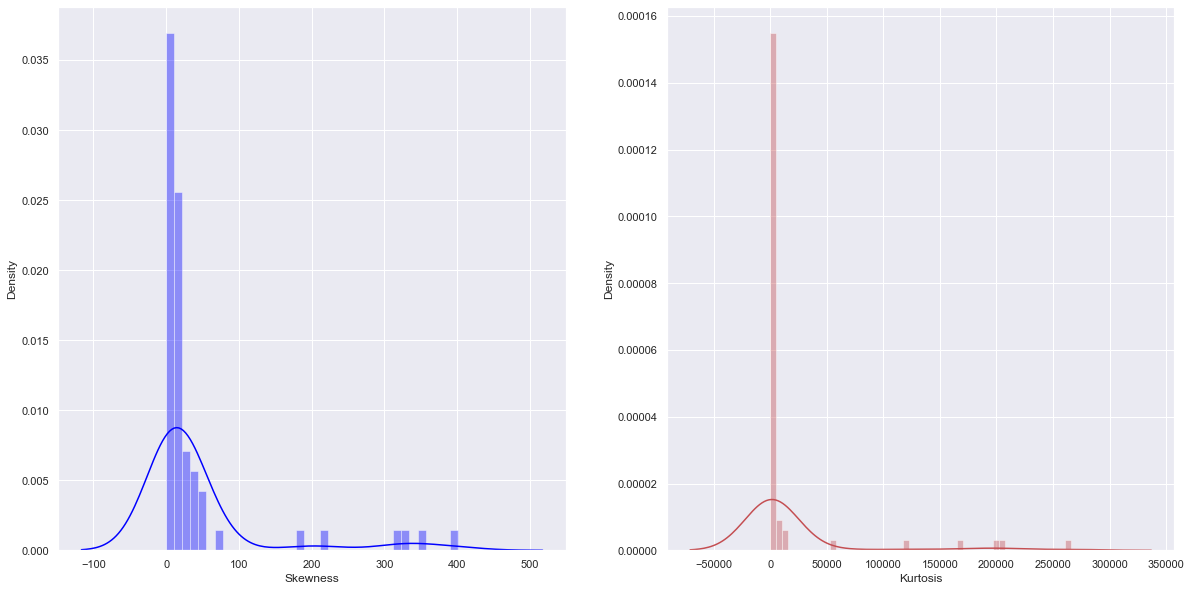

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.distplot(df.skew(), color='blue', axlabel ='Skewness', ax=ax1)
sns.distplot(df.kurt(), color='r', axlabel ='Kurtosis', norm_hist= False, kde = True, rug = False, ax=ax2)

Бачимо, що у більшості свої наші фічі мають тенденцію до позитивної асиметрії та ексцесу, що наштовхує на думку про їх експоненціальний характер. 

## Target

Дослідимо таргет, його розподіл та основні залежності доходу.

<AxesSubplot:xlabel='target_full_ltv_day30', ylabel='Density'>

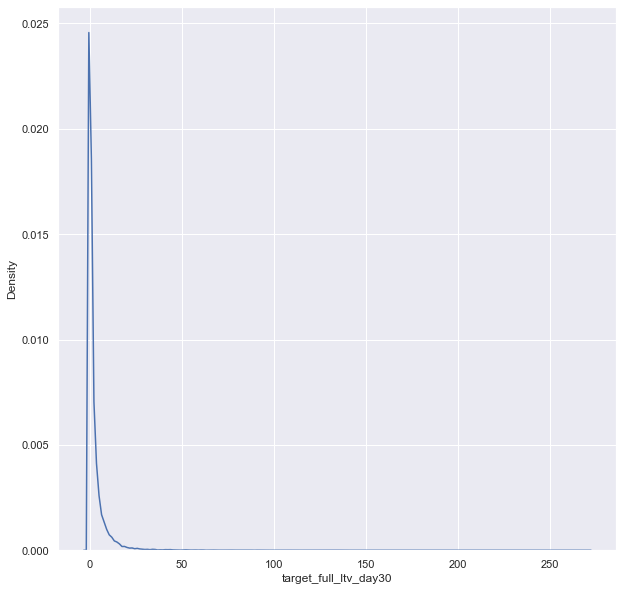

In [6]:
plt.figure(figsize=(10, 10))
sns.kdeplot(df['target_full_ltv_day30'])

Бачимо, що наша величина, яка означає сумарний дохід від користувача на 30 день користування додотком, має кілька від'ємних прикладів, що явно є викидами (позбудемося їх). В результаті отрмаємо неперервну випадкову величену, розподілено за екпоненціальний законом.

In [3]:
df = df[df['target_full_ltv_day30'] >= 0]
df['target_full_ltv_day30'].describe([0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

count    1.467831e+06
mean     2.568749e-01
std      2.274465e+00
min      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
80%      2.019713e-03
85%      1.311969e-02
90%      4.522642e-02
95%      5.122285e-01
99%      6.620580e+00
max      2.720042e+02
Name: target_full_ltv_day30, dtype: float64

Бачимо, що якийсь помітний дохід приносять тільки 2-3% користуваів. Давайте розгялнемо, які когорти приносять найбільше доходу.

<AxesSubplot:ylabel='target_full_ltv_day30'>

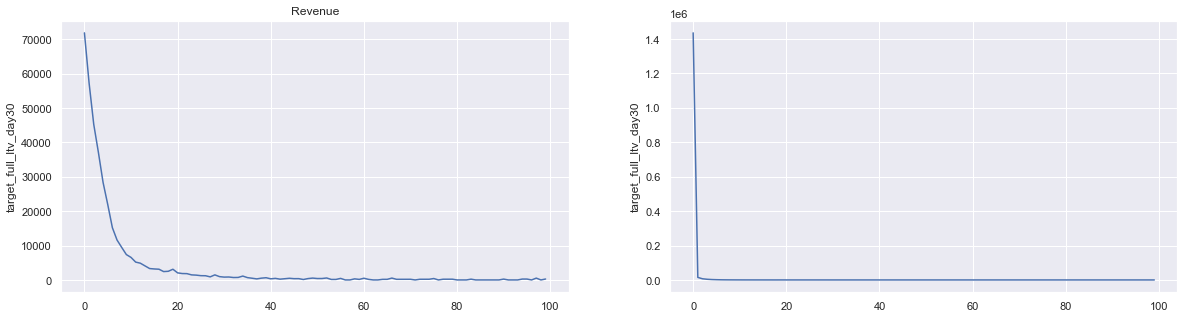

In [8]:
df['bins'] = pd.cut(df['target_full_ltv_day30'], 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.lineplot(x=np.arange(100), y=df.groupby('bins')['target_full_ltv_day30'].sum(), ax=ax1)
ax1.title.set_text('Revenue')
sns.lineplot(x=np.arange(100), y=df.groupby('bins')['target_full_ltv_day30'].count(), ax=ax2)

Як виявляється, основний прибуток додатку приносять користувачі, що поодному вносять малу користь, проте своїм число (переважна більшість користувачів) у сумі складають головну масу доходу. Оскільки експоненційний розподіл не є симетричним, моделі буде складно навчанится на таких даних, тому перед тренування таргет потрідно нормалізувати.

Спробуємо визначити, яку частку доходу приносять відповідні категорії media_source, country_code, platform.

In [13]:
grouped = df_plot.groupby('country_code')['target_full_ltv_day30'].sum().sort_values()[-20:]
country_no_zero = grouped[grouped != 0].index
df_plot_country = df_plot[[el in country_no_zero for el in df_plot['country_code']]]

[Text(0, 0, 'COUNTRY_141'),
 Text(1, 0, 'COUNTRY_13'),
 Text(2, 0, 'COUNTRY_155'),
 Text(3, 0, 'COUNTRY_208'),
 Text(4, 0, 'COUNTRY_35'),
 Text(5, 0, 'COUNTRY_137'),
 Text(6, 0, 'COUNTRY_38'),
 Text(7, 0, 'COUNTRY_129'),
 Text(8, 0, 'COUNTRY_203'),
 Text(9, 0, 'COUNTRY_194'),
 Text(10, 0, 'COUNTRY_132'),
 Text(11, 0, 'COUNTRY_156'),
 Text(12, 0, 'COUNTRY_72'),
 Text(13, 0, 'COUNTRY_52'),
 Text(14, 0, 'COUNTRY_5'),
 Text(15, 0, 'COUNTRY_8'),
 Text(16, 0, 'COUNTRY_23'),
 Text(17, 0, 'COUNTRY_204'),
 Text(18, 0, 'COUNTRY_210'),
 Text(19, 0, 'COUNTRY_26')]

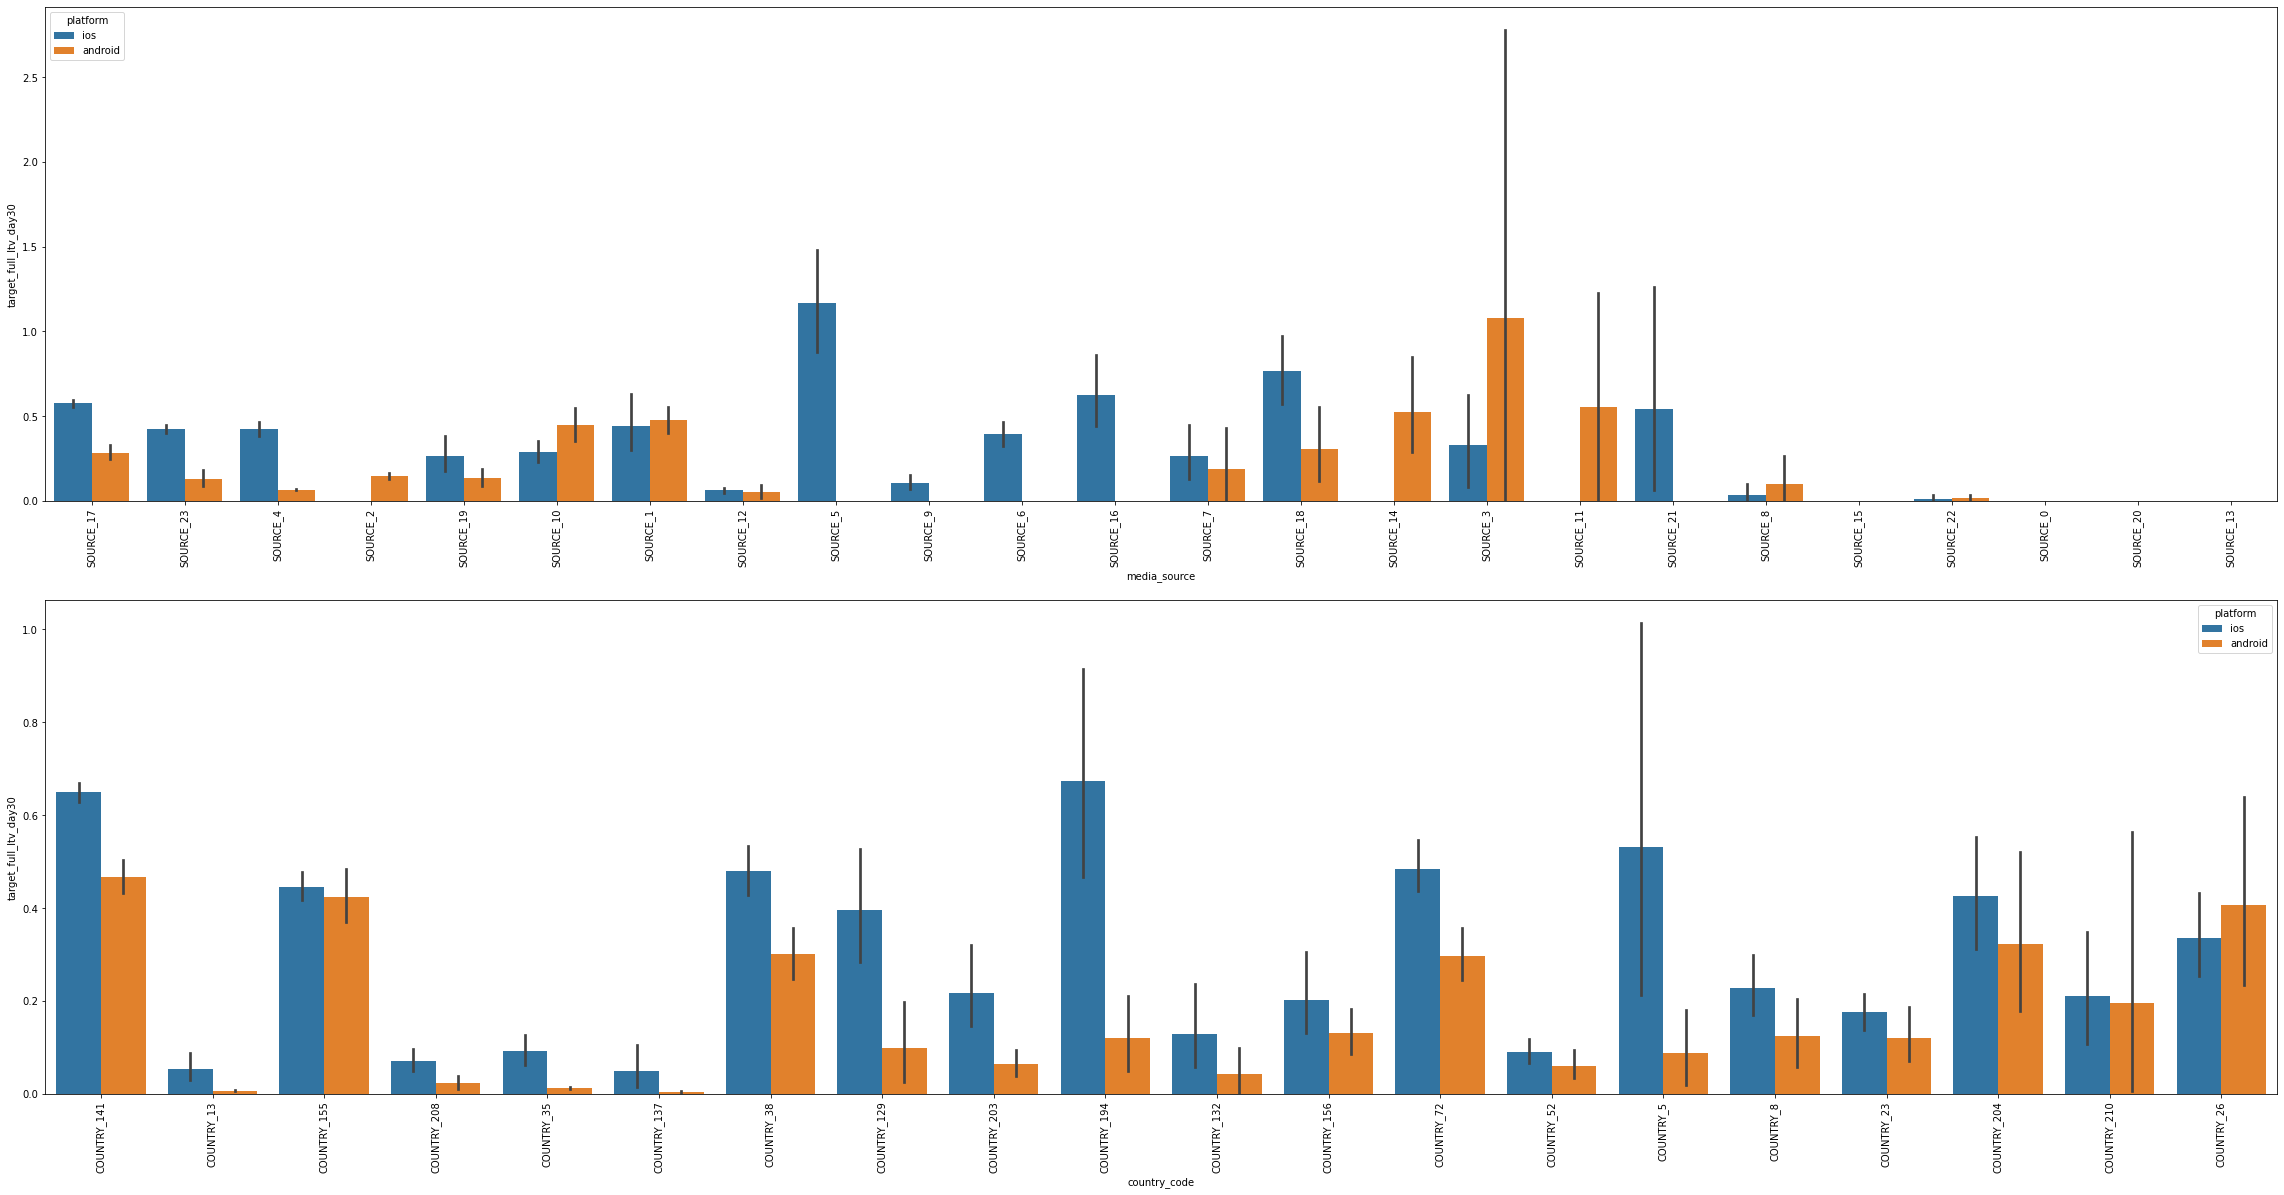

In [14]:
df = df.drop('bins', axis=1)
df_plot = df.sample(500000)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40, 20))
sns.barplot(x='media_source', y='target_full_ltv_day30', data=df_plot, hue='platform', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

grouped = df_plot.groupby('country_code')['target_full_ltv_day30'].sum().sort_values()[-20:]
country_no_zero = grouped[grouped != 0].index
df_plot_country = df_plot[[el in country_no_zero for el in df_plot['country_code']]]
sns.barplot(x='country_code', y='target_full_ltv_day30', data=df_plot_country, hue='platform', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

Бачимо, що є кілька каналів, які приносять користувачів, що не приносять дохід взагалі, є сенс усунути ці канала. Також бачимо кілька резурсів як 10, 1, 14, 3, 11, 8, які залучають більше користувачів платформи IOS, тому можна зробити певний ексклюзив для них або кращу підтримку. У рештах випадків домінує платформа Android.

Також ми вивели топ 20 країн по сумарному доходу від користувачів. Як бачимо, тільки десяток країн залучають значну кількість коштів, також є чітка тенденція на Android. З цього можна зробити висновок, що для збільшенню доходу, варто більше поширювати свій продук на країни, що не реалізували ще свою потенційну кількість учасників.

## Missing values

Оглянемо, яка частина данних є загубленною.

In [15]:
df.isna().sum()

total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
target_full_ltv_day30        0
year                         0
month                        0
day                          0
day_of_week                  0
Length: 67, dtype: int64

Як бачимо тільки група фіч total_session має незначну кількість втрачених даних, давайте дослідимо їх детальніше.

In [16]:
df[df.isna().any(axis=1)].sort_values('target_full_ltv_day30').tail(15)

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30,year,month,day,day_of_week
40607,NaN,NaN,NaN,NaN,3,3,3,3,4,4,4,4,0,0,0,0,128,128,128,128,128,128,128,128,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.150615,0.150615,0.150615,1.518320,1.518320,1.518320,SOURCE_17,2021-12-01,COUNTRY_141,0.078295,0.078295,0.078295,ios,0.150615,1.518320,0.078295,1.747230,2021,12,01,3
160329,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,0,0,0,0,174,174,174,174,75,75,75,75,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,1.790639,1.790639,1.790639,SOURCE_17,2022-01-26,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,1.790639,0.000000,1.790639,2022,01,26,3
40609,NaN,NaN,NaN,NaN,1,1,1,1,2,2,2,2,1,1,1,1,181,181,181,181,36,36,36,36,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,1.870383,1.870383,1.870383,SOURCE_23,2021-12-01,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,1.870383,0.000000,1.870383,2021,12,01,3
13277,NaN,NaN,NaN,NaN,1,1,1,1,2,2,2,2,0,0,0,0,22,22,22,22,12,12,12,12,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.128915,0.128915,0.128915,0.000000,0.000000,0.000000,SOURCE_17,2021-12-02,COUNTRY_155,0.000000,0.000000,0.000000,ios,1.913692,0.000000,0.000000,1.913692,2021,12,02,4
86195,NaN,NaN,NaN,NaN,2,2,2,2,3,3,3,3,0,0,0,0,124,124,124,124,121,121,121,121,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,2.039836,2.039836,2.039836,SOURCE_17,2021-12-11,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,2.039836,0.000000,2.039836,2021,12,11,6
680403,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,0,0,0,0,20,20,20,20,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-22,COUNTRY_141,0.000000,0.000000,0.000000,ios,2.052116,0.000000,0.000000,2.052116,2021,12,22,3
959886,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,0,0,0,0,91,91,91,91,58,58,58,58,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.968619,1.128707,1.128707,1.128707,SOURCE_17,2021-12-23,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.968619,1.128707,0.000000,2.097326,2021,12,23,4
667216,NaN,NaN,NaN,NaN,1,1,1,1,2,2,2,2,0,0,0,0,189,189,189,189,41,41,41,41,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,2.172787,2.172787,2.172787,SOURCE_23,2022-01-12,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,2.172787,0.000000,2.172787,2022,01,12,3
279580,NaN,NaN,NaN,NaN,1,1,1,1,2,2,2,2,0,0,0,0,72,72,72,72,58,58,58,58,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1.006826,0.838742,0.838742,0.838742,SOURCE_17,2022-01-19,COUNTRY_141,0.000000,0.000000,0.000000,ios,2.013652,0.838742,0.000000,2.852394,2022,01,19,3
13347,NaN,NaN,NaN,NaN,3,3,3,3,4,4,4,4,0,0,0,0,179,179,179,179,174,174,174,174,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.171250,0.17125

In [17]:
df[df.isna().any(axis=1)]['target_full_ltv_day30'].describe([0.75, 0.9, 0.95])

count    1374.000000
mean        0.058955
std         0.410302
min         0.000000
50%         0.000000
75%         0.000000
90%         0.015142
95%         0.067544
max         7.934691
Name: target_full_ltv_day30, dtype: float64

Ця вибірка даних є цілком репризентативною так, як в цілому у вибірці також 75% юзерів не приносять дохід, 23% - приносять не значний дохід та тільки приблизно 2% юзер складають основну частку доходу. Отож ми можемо безпечно вилучити рядки із пропущеними значеннями із датасету. Вони не мають значних відмінностей від всіх даних та не несуть якоїсь ексклюзивності.

In [4]:
df = df.dropna()
df

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_135,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_2,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_1,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,10,10,3,3,3,3,282,282,282,282,254,254,254,254,7,7,7,7,0,0,0,1,1,8,2,2,9,0,0,3,29,29,237,1,1,6,0.0,0.0,0.00000,4.174198,4.174198,4.174198,SOURCE_17,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,12,13,0,0,0,0,346,554,658,732,254,542,658,721,5,9,11,12,1,1,0,3,9,13,4,10,13,0,0,0,174,542,721,3,9,12,0.0,0.0,1.17629,4.899572,7.841280,9.404430,SOURCE_23,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,16,19,0,0,0,0,265,497,857,913,254,496,809,901,4,8,13,16,1,1,0,0,5,13,1,5,14,0,0,0,0,254,685,0,4,12,0.0,0.0,0.00000,4.036153,8.875894,13.928170,SOURCE_23,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,24,24,7,7,7,7,1308,1308,1308,1308,1278,1278,1278,1278,12,12,12,12,0,0,0,9,23,25,10,23,25,4,7,7,524,1249,1295,6,12,12,0.0,0.0,0.00000,7.402224,7.402224,7.402224,SOURCE_4,2021-12-30,COUNTRY_141,0.177550,0.177550,0.177550,ios,0.000000,7.402224,0.177550,7.579774


## Clustering

Тут ми намагатимемося поділити наші дані на кластери відносно таргета та визначити, якісь тенденцій чи тренди у кореляційному аналізі.

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop(['target_full_ltv_day30', 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30'], axis=1).select_dtypes(np.number))
df['clst'] = kmeans.labels_
df

<AxesSubplot:xlabel='clst', ylabel='count'>

<Figure size 720x720 with 0 Axes>

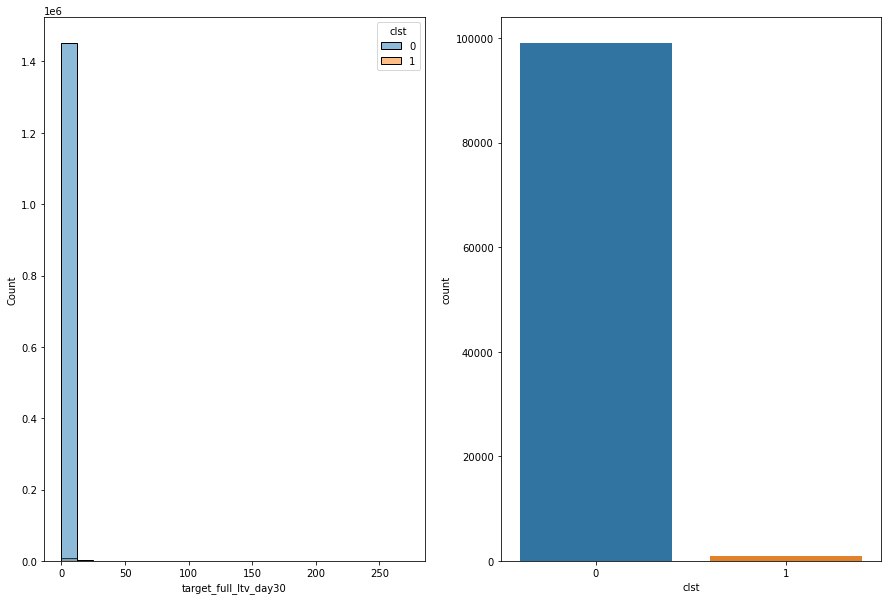

In [7]:
plt.figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
sns.histplot(x='target_full_ltv_day30', hue='clst', data=df, ax=ax1)
sns.countplot(df_plot['clst'], ax=ax2)

## Correlation analysis

На цьому етапі спробуємо побудувати корреляційну матрицю всіх фіч та знайти інсайди для подальшого аналізу.

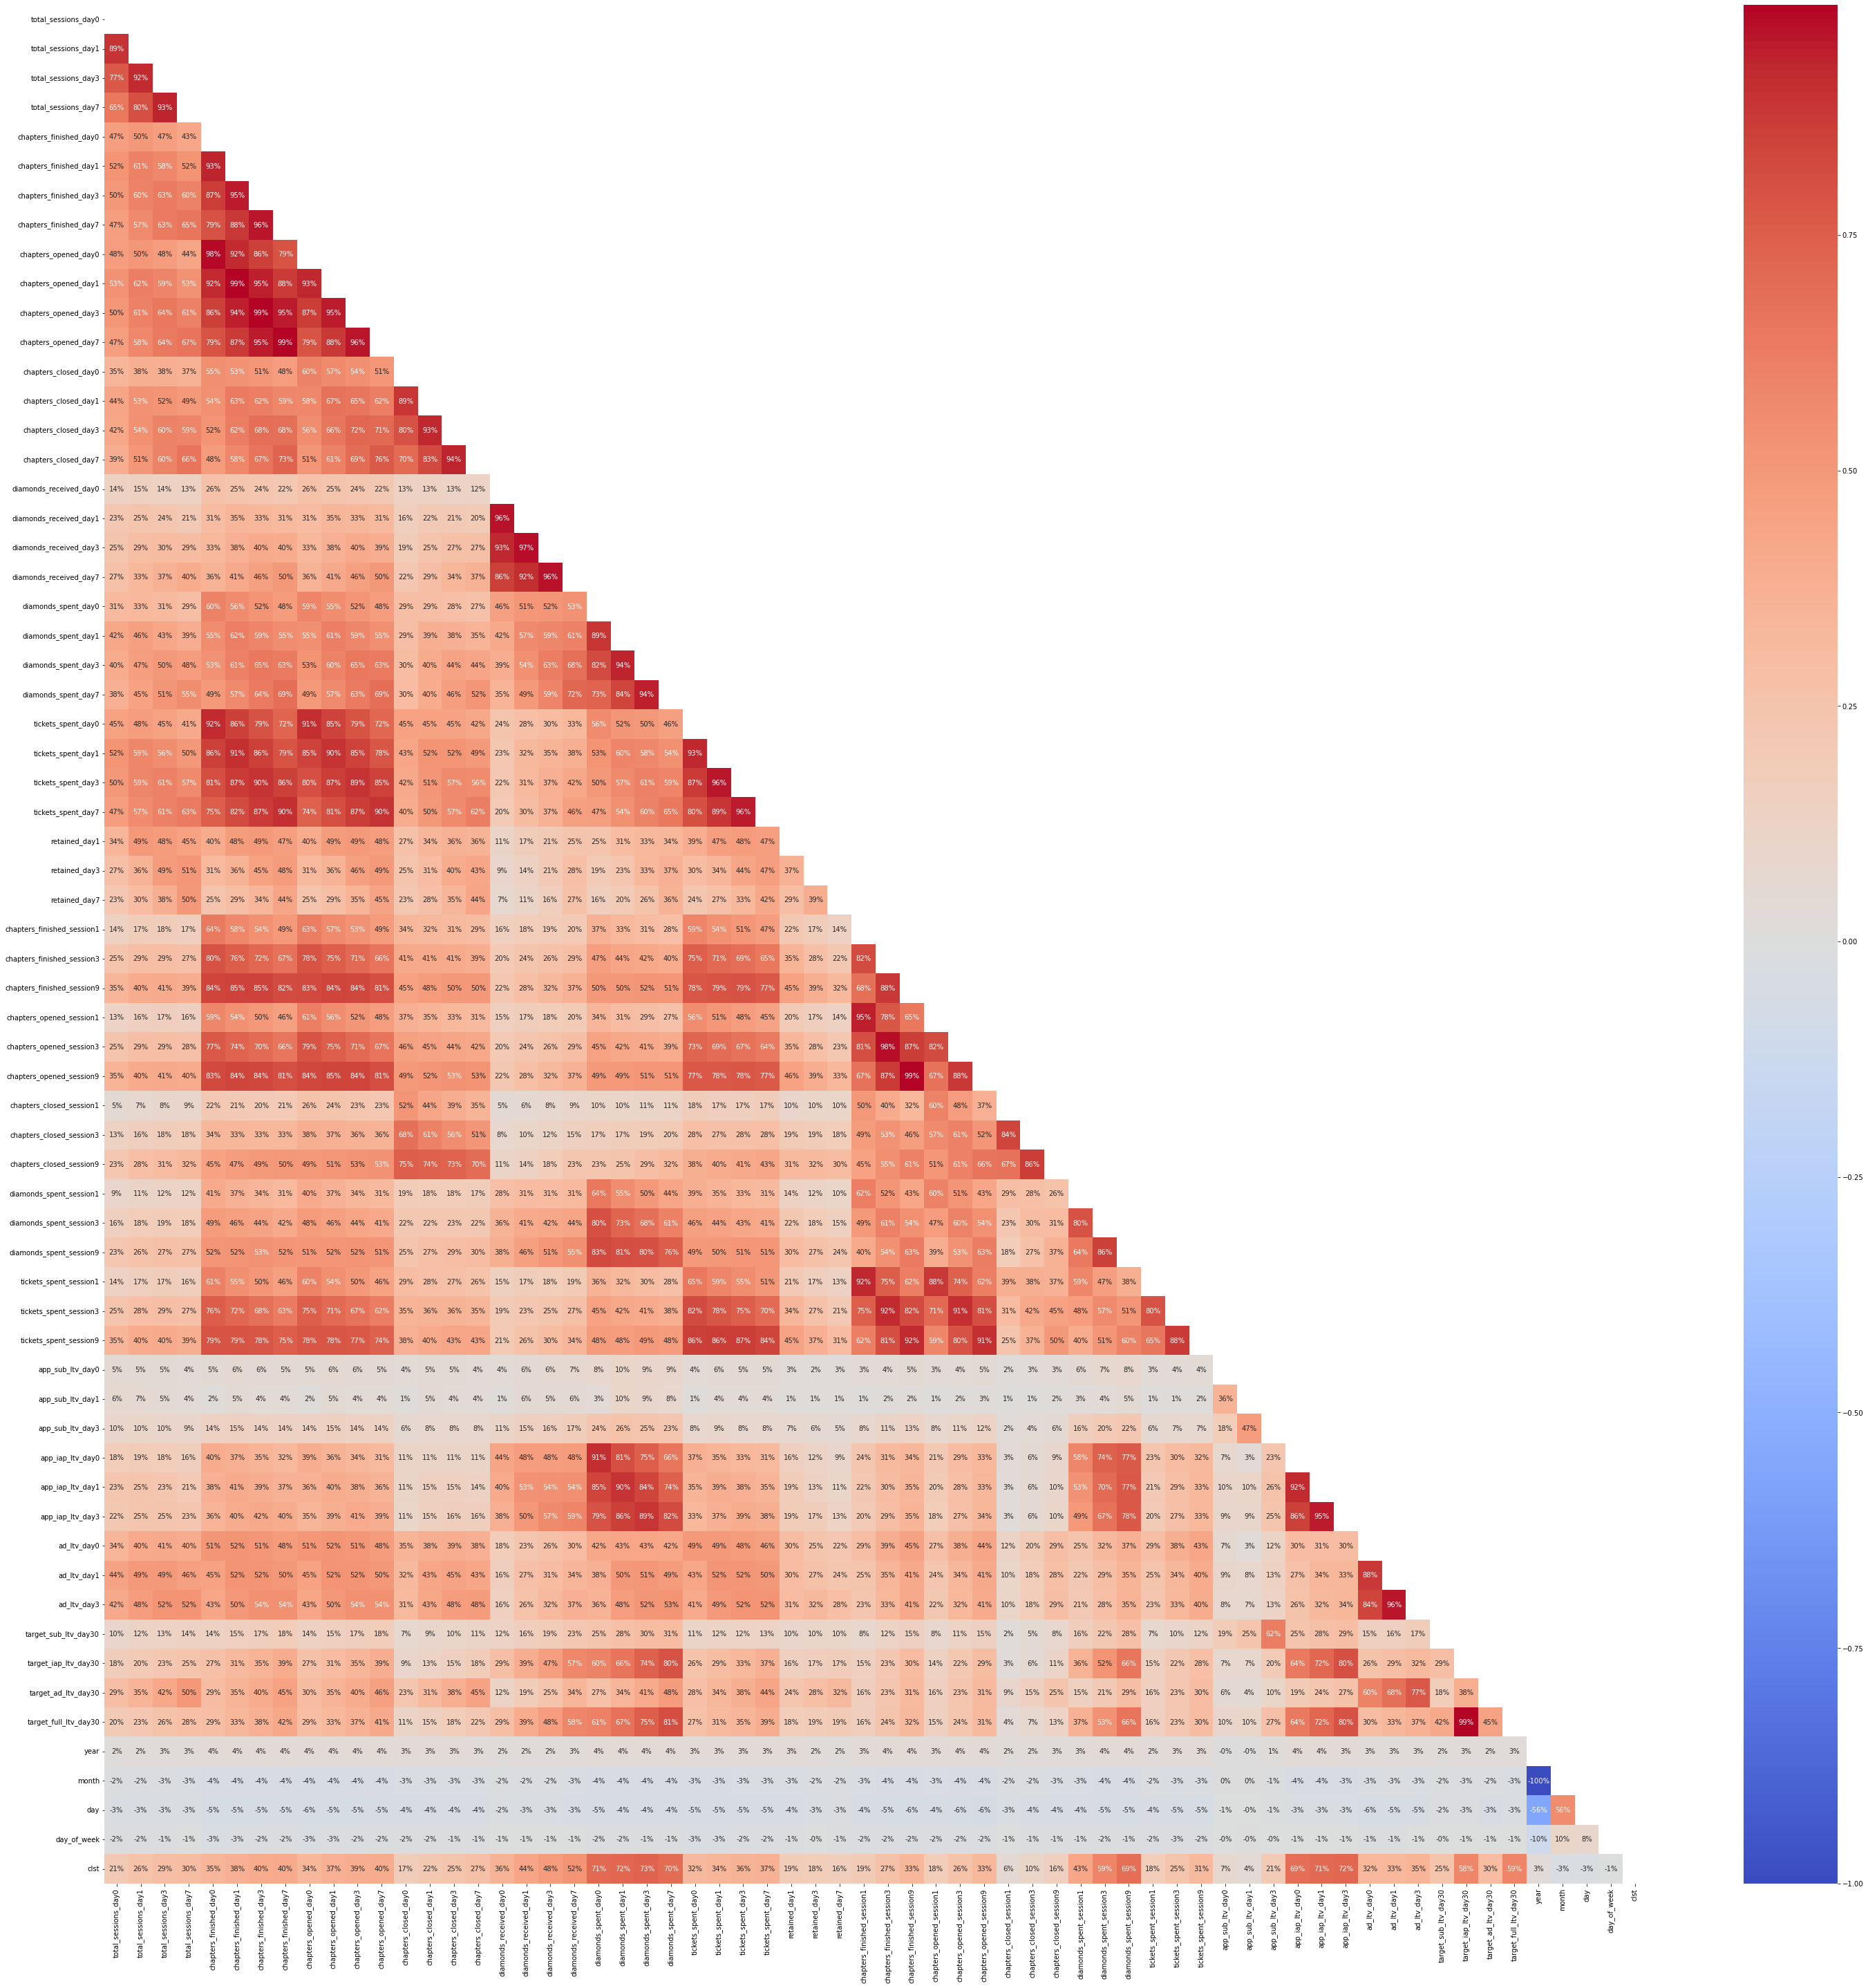

In [4]:
plt.figure(figsize=(50,50))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt=".0%", mask=mask, cmap="coolwarm")
plt.savefig('correlation_matrinx.png')

Переглянути таблицю можна у файлі correlation_matrix.png  у більших деталях.

Можемо побачи сильну кореляцію фіч типу diamond_spent, app_iap_ltv (~70%) з таргетом (target_full_ltv_day30), а також помірну кореляцію фіч типу tickets_spent, chapter_opened, chapter_finished із таргетом (~35%).
Такий же тренд спостерігається для target_iap_ltv_day30.
Натомість target_ad_ltv_day30 має помірну кореляцію із total_sessions та chapter_opened/finished/closed_day блоками, високу кореляцію із ad_ltv.
target_sub_ltv_30d не має значної кореляції із якимись фічами, окрім як app_sup_ltv. Вище зазначені фічі скоріш за все несуть важливу інформації та гратимуть визначну роль для прознозування траргету. Для бізнесу є очевидним, що купівля (ну і їх витрата) кристалів, корелює з прибудток; оскільки розділи новел купуються, то чим більша їх кількість - тим більший шанс, що вони були придбані.


Також помітно, що підвищення кореляції відбувається "блоками" фіч (такі як *chapter_*, *diamonds_* і т.д.), що відповідають за одинакову метрику, проту за різні дні. Також бачимо сильну кореляцію між групами ticket_spent та chapter_opened/finished, diamond_spent та app_aip_ltv.

<AxesSubplot:>

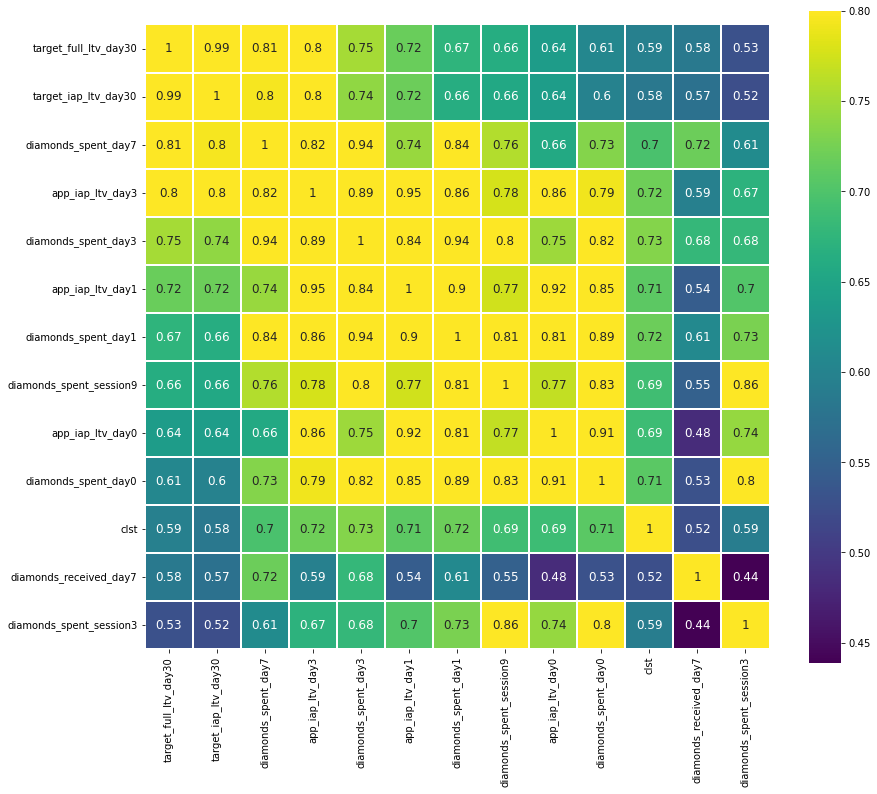

In [7]:
k = 13
cols = corr.nlargest(k,'target_full_ltv_day30')['target_full_ltv_day30'].index
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

У нас майже функціональна залежність між таргетом та iap_ltv_day30, що означає, що основу частку з доходу одного користувача є залучення його ресурсів. Оскільки таргет скалдається із суми 3 параметрів: реклама, підписка, донати - то бізнесу варто знаходити різні підходи для користувачів. Наприклад, для людей схильних донатити, більш глибокі та тривалі новели, які будуть повертати їх назад та не переривати прцес рекламою. Іншим - данамічні новели, так, щоб частість виводу реклами не викликала дратуванн. Таким чином можна підвищити монетизацію.

В принципі бачимо, що найбільш корелюючі фічі є так чи інакше пов'язані із залучення ресурсі користувача.
З іншого боку ми пам'ятажмо, що основний дохід складає велика маса малоприбуткомих юзерів. Обидві категорії важливі, але оскільки 2 має більшу вагу, варто їх приділяти більше уваги.

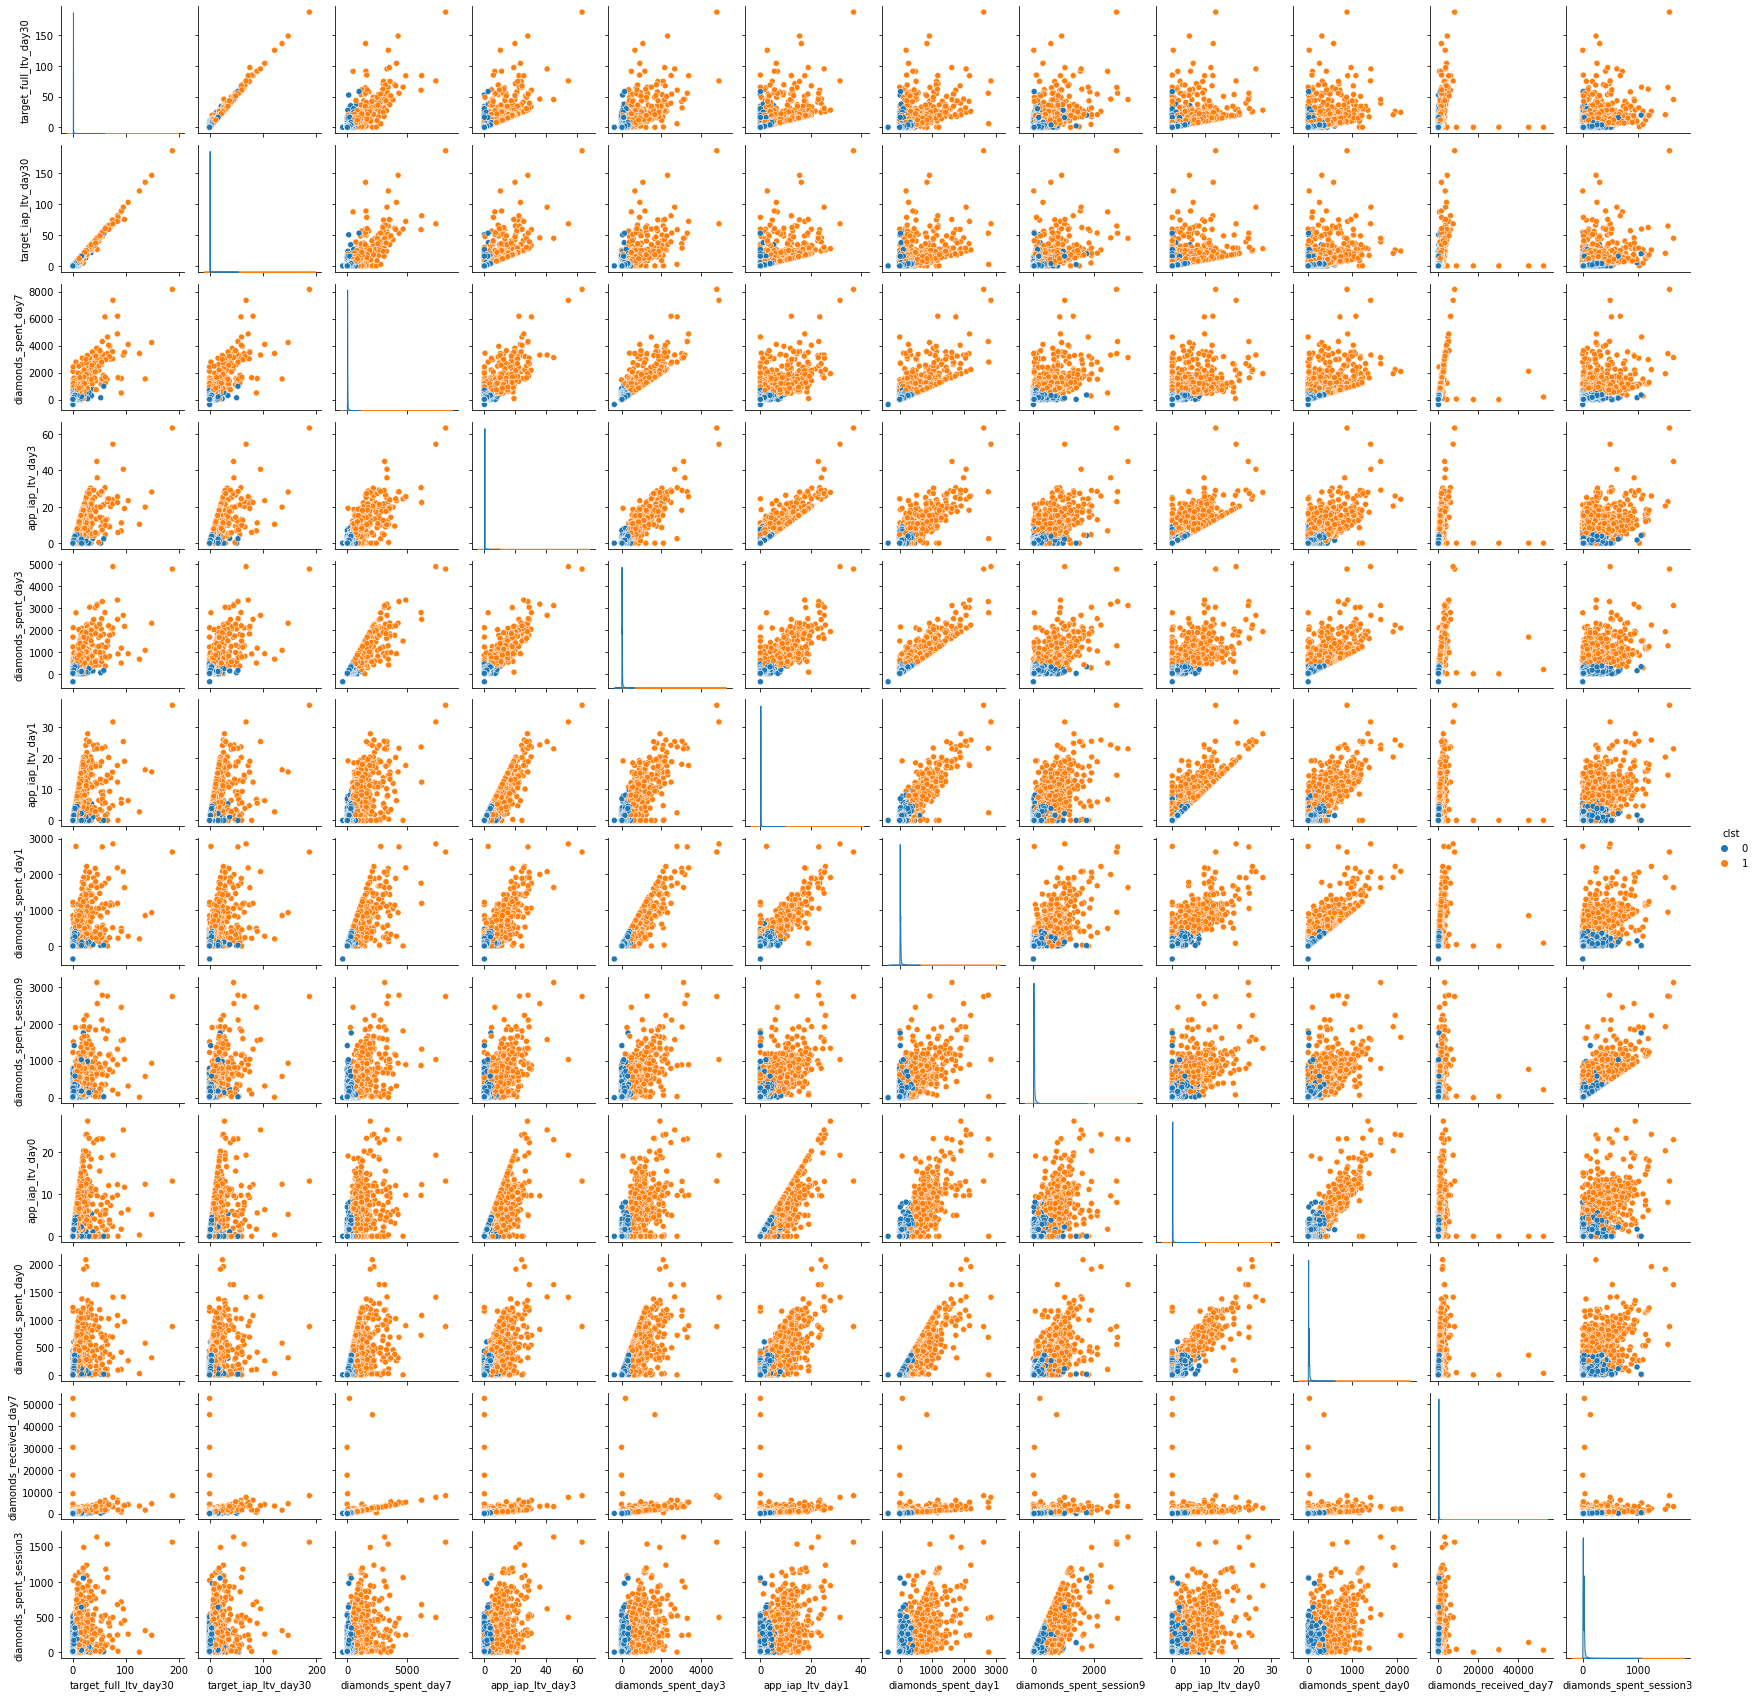

In [8]:
sns.pairplot(df_plot[cols], size=2, kind ='scatter', diag_kind='kde', hue='clst')

Бачимо, користувачі, які не приносять багато прибутку мало взаємодіють із продуктом, тому не мають до нього інтересу, з чого не можна винести користь. 

## Feature seleciton

Як результат наші передбачення на рахунок дати не справдилися і вони не принесли жодної користі, тому можемо позбутися їх

In [7]:
df = df.drop(['install_date', 'year', 'month', 'day', 'day_of_week'], axis=1)

In [5]:
df.to_csv('prep_df.csv', index=False)